In [252]:
import pandas as pd
import numpy as np
import pandas_datareader.data as wb

In [253]:
#importando dados

In [254]:
ativo = wb.get_data_yahoo('AUDJPY=X', start=2000)
ativo = ativo.drop(columns='Volume')
ativo = ativo.drop(columns='Adj Close')
ativo['MM10'] = ativo['Close'].rolling(10).mean()
ativo['MM20'] = ativo['Close'].rolling(20).mean()
ativo['MM100'] = ativo['Close'].rolling(100).mean()
ativo['MM200'] = ativo['Close'].rolling(200).mean()
ativo

,High,Low,Open,Close,MM10,MM20,MM100,MM200
Date,,,,,,,,
2003-12-01,79.739998,78.820000,79.338997,79.370003,NaN,NaN,NaN,NaN
2003-12-02,79.923111,79.272598,79.370003,79.610001,NaN,NaN,NaN,NaN
2003-12-03,79.812798,79.190002,79.589996,79.730003,NaN,NaN,NaN,NaN
2003-12-04,79.739998,79.110001,79.730003,79.570000,NaN,NaN,NaN,NaN
2003-12-05,79.650002,79.095200,79.589996,79.199997,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-01-19,80.296997,79.690002,79.690002,79.691002,80.279701,79.538851,76.837128,75.045765
2021-01-20,80.342003,79.983002,80.127998,80.123001,80.320101,79.636601,76.857078,75.101829
2021-01-21,80.509003,80.247002,80.291000,80.306999,80.299801,79.727951,76.881678,75.163924


In [255]:
mais_recente = ativo.iloc[[-2]]
mais_recente

,High,Low,Open,Close,MM10,MM20,MM100,MM200
Date,,,,,,,,
2021-01-22,80.440002,79.900002,80.309998,80.322998,80.2686,79.808601,76.915528,75.222374


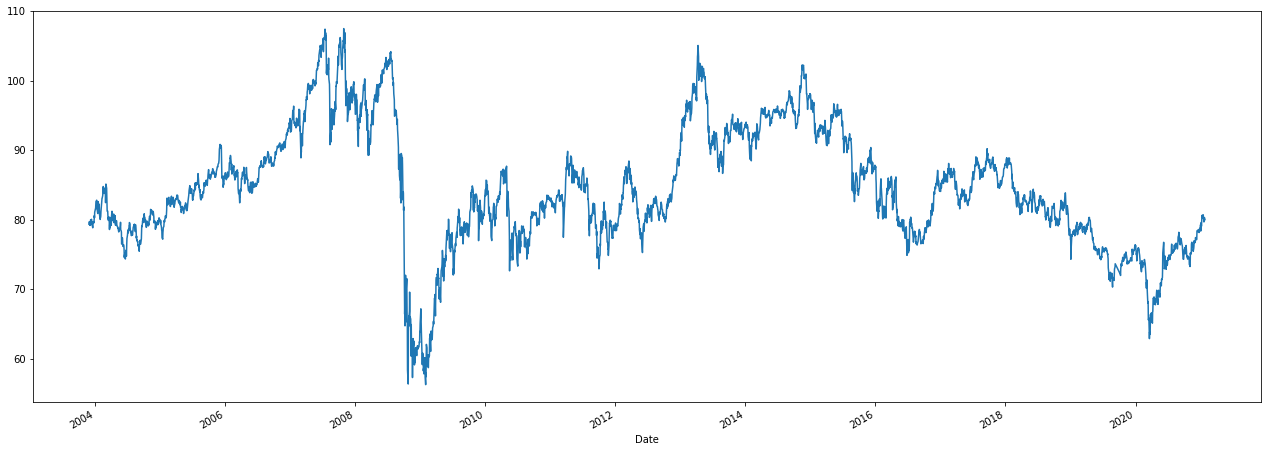

In [256]:
ativo['Close'].plot(figsize=(22,8))

In [257]:
resultado = []
for i in range(0, len(ativo)):
  if ativo['Close'][i] > ativo['Open'][i]:
    resultado.append(1)
  else:
    resultado.append(0)

In [258]:
resultado.pop(0)
resultado.append('Espera')
ativo['Resultado'] = resultado

In [259]:
ativo = ativo.dropna()
#ativo['MM10'] = ativo['Close'] - ativo['MM10']
#ativo['MM20'] = ativo['Close'] - ativo['MM20']
#ativo['MM100'] = ativo['Close'] - ativo['MM100']
#ativo['MM200'] = ativo['Close'] - ativo['MM200']
#ativo['Close'] = ativo['Close'] / ativo['Open']
#ativo['Low'] = ativo['Low'] / ativo['Open']
#ativo['High'] = ativo['High'] / ativo['Open']
#ativo['Open'] = ativo['Open'] / ativo['Open']
#ativo

In [260]:
previsores = ativo.iloc[:len(ativo)-1,0:8]
classe = ativo.iloc[:len(ativo)-1,8]
classe = classe.astype('int')

In [261]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [262]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [263]:
from sklearn.neural_network import MLPClassifier
classificador = MLPClassifier(verbose=True, max_iter=1000, tol=0.0000010, hidden_layer_sizes=(5, 5, 5))
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

Iteration 1, loss = 0.77870807
Iteration 2, loss = 0.76657728
Iteration 3, loss = 0.75662879
Iteration 4, loss = 0.74741297
Iteration 5, loss = 0.73931891
Iteration 6, loss = 0.73215112
Iteration 7, loss = 0.72586831
Iteration 8, loss = 0.71996327
Iteration 9, loss = 0.71385661
Iteration 10, loss = 0.70873674
Iteration 11, loss = 0.70483106
Iteration 12, loss = 0.70129815
Iteration 13, loss = 0.69869825
Iteration 14, loss = 0.69692779
Iteration 15, loss = 0.69564650
Iteration 16, loss = 0.69479208
Iteration 17, loss = 0.69421980
Iteration 18, loss = 0.69393325
Iteration 19, loss = 0.69363264
Iteration 20, loss = 0.69337158
Iteration 21, loss = 0.69322723
Iteration 22, loss = 0.69307958
Iteration 23, loss = 0.69302930
Iteration 24, loss = 0.69296185
Iteration 25, loss = 0.69293002
Iteration 26, loss = 0.69294776
Iteration 27, loss = 0.69290815
Iteration 28, loss = 0.69287030
Iteration 29, loss = 0.69289189
Iteration 30, loss = 0.69281340
Iteration 31, loss = 0.69287275
Iteration 32, los

In [264]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [265]:
print(precisao)
print(matriz)

0.5259026687598116
[[ 31 263]
 [ 39 304]]


In [266]:
# Conclusão: entre 48% e 53%

In [267]:
teste1 = classificador.predict(mais_recente)

In [268]:
teste1

array([0])